In [24]:
# 오늘이나 내일중으로 강아지 고양이 이미지 데이터셋이 있는데 이 둘을 분류하는 분류기를 만들거임(CNN)

https://github.com/taehojo/deeplearning/blob/master/ch16.ipynb
위 코드 참고

In [25]:
# lstm을 이용한 뉴스 카테고리 분류
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [26]:
# mnist 데이터셋을 불러와 학습 데이터셋, 테스트 데이터셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


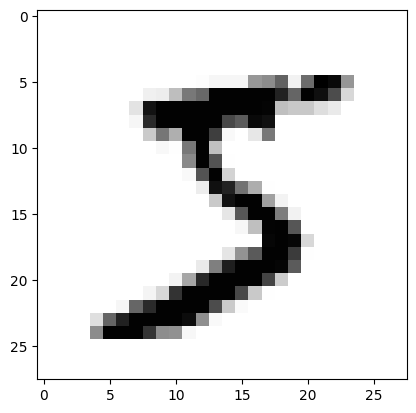

In [28]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [29]:
X_train[0] # 이렇게 쓰면 알아볼 수 없음

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
# 이건 직접 해본 거
for x in X_train[0]:
    for i in x:
        print('%-3s' % i, end='')
    print('')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [31]:
# 글자를 코드로 확인하기 위해 sys 기능을 이용
import sys 
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [32]:
X_train = X_train.reshape(X_train.shape[0], 784) # 평탄화 작업을 한 것임

In [33]:
X_train.shape

(60000, 784)

In [34]:
X_train = X_train.astype('float64')
X_train = X_train / 255 # 가장 큰 값을 나눠서 0~1의 숫자로 범위 수정

In [35]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255 # float은 0~1사이의 값으로 출력되도록 하기 위함임
# float으로 하지 않으면 다소 성능이 떨어진다고 함

In [37]:
# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0])) # X_train의 정답은 이것임

class : 5 


In [38]:
# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 일반적인 딥러닝 구조로 이미지 분류 모델
# CNN 딥러닝 구조로 이미지 분류 모델

In [40]:
# 위에서 작업했던 내용은 결국 아래와 같음
# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255 # 평탄화 후 타입 변환
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [45]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력 차원은 결국 28*28이라고 보면 됨
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# import os
# # 모델 최적화를 위한 설정구간입니다.
# MODEL_DIR = './data/model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR) # 해당 경로에 폴더 생성하는 듯
#     os.makedirs(MODEL_DIR, exist_ok=True) # 아마 안되면 이걸로?
modelpath="MNIST_MLP.hdf5" # 파일 저장 경로

In [50]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [51]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [52]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.17199, saving model to MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.17199 to 0.11496, saving model to MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.11496 to 0.09684, saving model to MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.09684 to 0.08801, saving model to MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.08801 to 0.08655, saving model to MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.08655 to 0.08390, saving model to MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08390

Epoch 8: val_loss did not improve from 0.08390

Epoch 9: val_loss did not improve from 0.08390

Epoch 10: val_loss did not improve from 0.08390

Epoch 11: val_loss did not improve from 0.08390

Epoch 12: val_loss did not improve from 0.08390

Epoch 13: val_loss did not improve from 0.08390

Epoch 14: val_loss did not improve from 0.08390

Epoch 15: val_loss did not improve from 0.08390

Epoch 16: val_loss did not improve from 0.08390


In [53]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))
# 10000-9817개 틀림

313/313 [==============================] - 1s 4ms/step - loss: 0.0835 - accuracy: 0.9817

 Test Accuracy: 0.9817


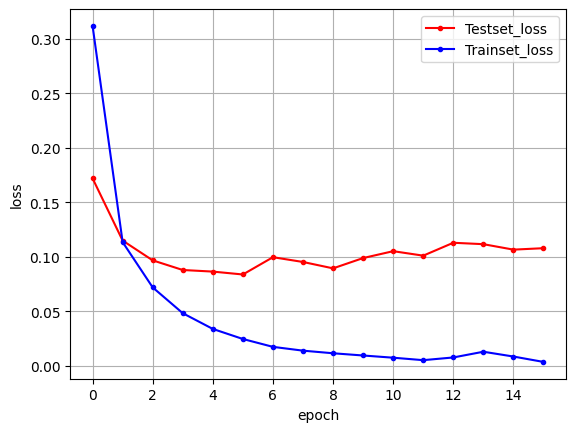

In [55]:
import numpy as np
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [56]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [57]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
X_train.shape # CNN은 2차원의 구조를 그대로 이용해야 함
# 또한 채널이 1로 세팅되었는데 1일 경우는 따로 입력하지 않아도 됨
# 채널이 1개가 아닌 경우는 입력해야 함

(60000, 28, 28, 1)

In [60]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 커널사이즈는 일반적으로 5*5로 많이 사용됨

In [61]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
modelpath="MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [63]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.07892, saving model to MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07892 to 0.05619, saving model to MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05619 to 0.04911, saving model to MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04911 to 0.04713, saving model to MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04713 to 0.04265, saving model to MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04265

Epoch 7: val_loss did not improve from 0.04265

Epoch 8: val_loss did not improve from 0.04265

Epoch 9: val_loss did not improve from 0.04265

Epoch 10: val_loss did not improve from 0.04265

Epoch 11: val_loss did not improve from 0.04265

Epoch 12: val_loss did not improve from 0.04265

Epoch 13: val_loss did not improve from 0.04265

Epoch 14: val_loss improved from 0.04265 to 0.04229, saving model to MNIST_CNN.hdf5

Epoch 15: val_loss did not improve from 0.04229

Epoch 16: val_loss did not improve from 0.04229

Epoch 17: va

In [64]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9924

 Test Accuracy: 0.9924


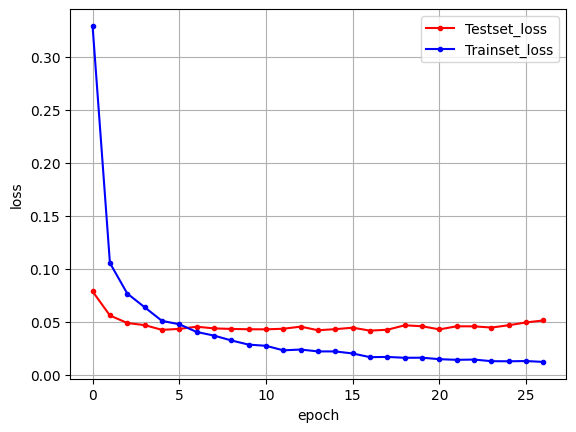

In [65]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 레이어는 정보가 복잡할수록 많아야 함

In [71]:
# 실험하기
# 위에서 작업했던 내용은 결국 아래와 같음
# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255 # 평탄화 후 타입 변환
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [72]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dense_15 (Dense)            (None, 15)                1935      
                                                                 
Total params: 469,519
Trainable params: 469,519
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelpath="MNIST_MLP.hdf5" # 파일 저장 경로
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

In [70]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9724

 Test Accuracy: 0.9724


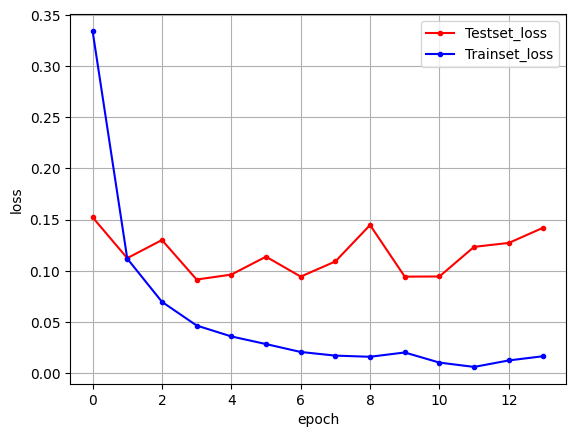

In [75]:
import numpy as np
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [83]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [84]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dense(256,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(10, activation='softmax'))
# 커널사이즈는 일반적으로 5*5로 많이 사용됨

In [85]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
modelpath="MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [87]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.07449, saving model to MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07449 to 0.06316, saving model to MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06316 to 0.04777, saving model to MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04777 to 0.04370, saving model to MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04370

Epoch 6: val_loss did not improve from 0.04370

Epoch 7: val_loss did not improve from 0.04370

Epoch 8: val_loss did not improve from 0.04370

Epoch 9: val_loss did not improve from 0.04370

Epoch 10: val_loss did not improve from 0.04370

Epoch 11: val_loss did not improve from 0.04370

Epoch 12: val_loss did not improve from 0.04370

Epoch 13: val_loss improved from 0.04370 to 0.04316, saving model to MNIST_CNN.hdf5

Epoch 14: val_loss did not improve from 0.04316

Epoch 15: val_loss did not improve from 0.04316

Epoch 16: val_loss did not improve from 0.04316

Epoch 17: val_loss did not improve from 0.04316


In [88]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9918

 Test Accuracy: 0.9918


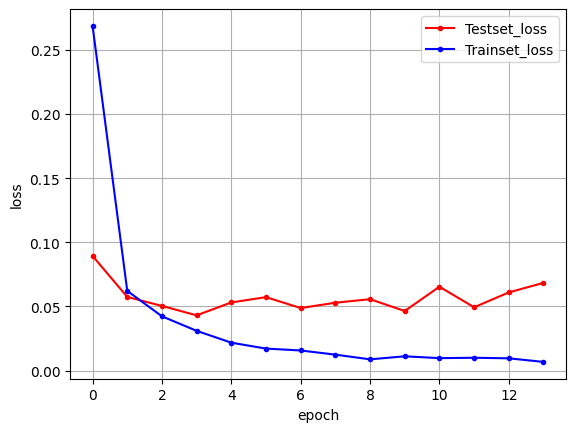

In [82]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

https://github.com/taehojo/deeplearning/blob/master/ch18.ipynb 이번엔 여기를 참고

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1500, test_split=0.2)
# reuter는 뉴스사? 이름임
# num_words는 reuter 뉴스 전체에 등장하는 단어들 중에서 가장 빈도가 높은 1000개의 단어만 사용
# 만약 1000개로 제한하지 않으면 예상 20만개라고 가정했을 때
# 단어가 많으면 하나의 기사당 등장할 수 있는 단어 20만개
# 8982 * 20만개로 엄청 큰 경우의 수가 등장함
# 이를 방지하기 위해 사용되는 단어의 수를 한정시키는 방법을 적용하게 됨

In [128]:
len(X_train) #  8982
np.unique(y_train) # 0~45 뉴스 카테고리

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [129]:
X_test.shape # (2246,)
print(X_train[0]) # 영단어를 숫자로 원핫인코딩한 내용을 보는 것임
# 로이터 뉴스 기사에 등장하는 영어 단어 -> 수치 인코딩

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [130]:
print(y_train[0]) # 로이터 뉴스 기사의 종류 46가지 -> 수치 인코딩

3


In [131]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 영단어의 인덱스 번호라고 생각하면 됨
# 추가로 1000개의 단어에서 사용된 것들이라고 보면 됨(1000개 단어에 포함이 되지 않았다면 제외되므로 완전한 문장이 아닐 가능성 높음)
# 예시로 '오늘은 날씨가 흐립니다. 오후 내내 비가 내릴 예정입니다.' 라고 있다면
# 3=오늘, 8=날씨, 23=흐림 이런식으로 선정되는데 '예정'이라는 단어가 2700위라면
# 오늘은 날씨가 흐립니다. 오후 내내 비가 내릴 입니다. 가 되는 것임

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# LSTM 구조
# 1:1, 1:n, n:1, n:n
# 여기서 하려는 것은 (여러개 입력 단어)n : (분류결과)1
# X_train[0]을 입력, 오늘(lstm) - 날씨(lstm) - 비(lstm) - 천둥(lstm) - ... - 예보
# 위와 같이 되며 오늘, 날시, 비, 천둥, ... 등이 원핫인코딩이 되어있을 때,
# y는 날씨 뉴스다 라는 레이블이 있음

In [132]:
len(X_train[0]) # 87
len(X_train[1]) # 56

# X_train에 저장된 데이터의 최대 길이를 출력
max_len, idx = 0, 0
for i, k in enumerate(X_train):
    if max_len < len(k):
        max_len = len(k)
        idx = i
print(max_len, idx)

max(list(map(len, X_train)))

2376 8699


2376

In [133]:
# 단어의 수를 맞추어 줍니다. zero-padding
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [134]:
# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [135]:
model = Sequential()
model.add(Embedding(1500, 200)) 
# 단어의 개수 1500차원 단어벡터공간 -> 임베딩(차원축소와 비슷) -> 200차원 벡터공간
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [ ]:
# 뉴스기사 8000개. 상위 1500개 단어만 임베딩.
# ex) 오늘(임베딩x) 날씨가(임베딩o) 흐립니다(임베딩o) => 날씨가(2번) 흐립니다(77번)
# 뉴스기사는 아무리 길어도 100을 넘어가지 않음
# 뉴스1 = 2, 53, 43, ..., 75(총 100개). 각 단어의 차원은 1500차원임
# 뉴스2 = 1200, 1499, 3, 0, ..., 25(총100개)
# 차원의 출력은 원핫인코딩과 동일함 2 => [0,0,2,0,0,0,0,...,0,0] 1500길이 => [0.1,0.2,2.1,0.1,....0.1] 이것이 임베딩

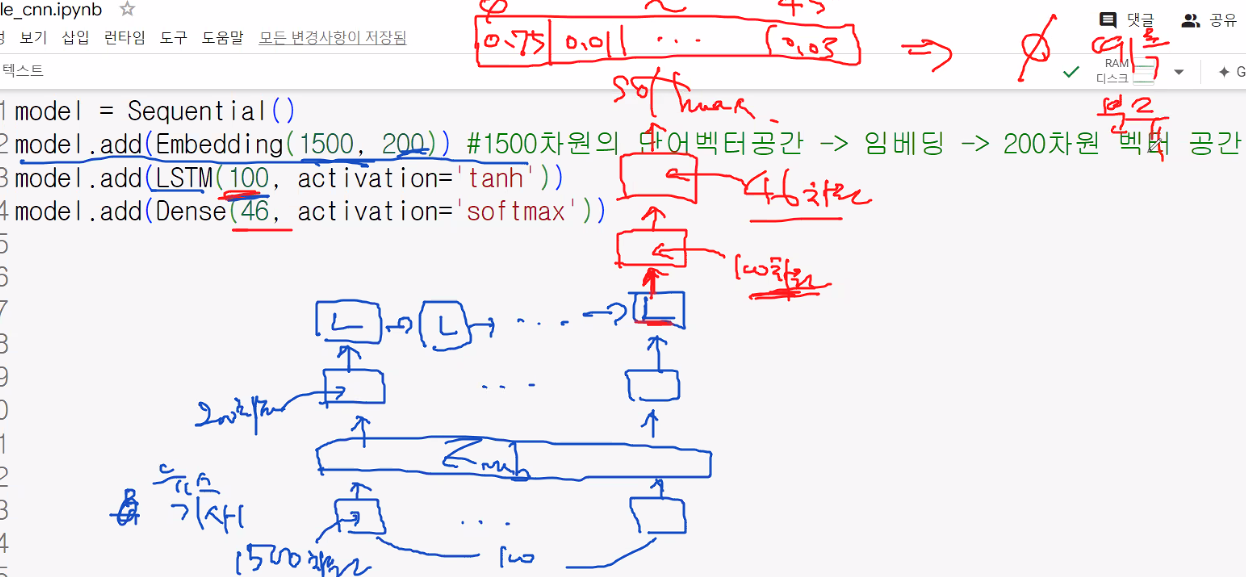

In [137]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         300000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               120400    
                                                                 
 dense_25 (Dense)            (None, 46)                4646      
                                                                 
Total params: 425,046
Trainable params: 425,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 예를 들어 영화의 줄거리를 입력받아 장르를 예측하고 싶다면 위와 같은 모델을 사용할 수 있음

In [138]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 20s 12ms/step - loss: 2.0680 - accuracy: 0.4821 - val_loss: 1.8586 - val_accuracy: 0.5294
Epoch 2/200
450/450 [==============================] - 5s 10ms/step - loss: 1.6926 - accuracy: 0.5650 - val_loss: 1.5776 - val_accuracy: 0.6073
Epoch 3/200
450/450 [==============================] - 5s 10ms/step - loss: 1.4439 - accuracy: 0.6363 - val_loss: 1.4818 - val_accuracy: 0.6278
Epoch 4/200
450/450 [==============================] - 5s 10ms/step - loss: 1.2405 - accuracy: 0.6833 - val_loss: 1.3312 - val_accuracy: 0.6572
Epoch 5/200
450/450 [==============================] - 5s 11ms/step - loss: 1.0704 - accuracy: 0.7296 - val_loss: 1.2457 - val_accuracy: 0.6857
Epoch 6/200
450/450 [==============================] - 5s 11ms/step - loss: 0.9451 - accuracy: 0.7578 - val_loss: 1.1913 - val_accuracy: 0.7106
Epoch 7/200
450/450 [==============================] - 5s 11ms/step - loss: 0.8305 - accuracy: 0.7904 - val_loss: 1.1669 - val_accuracy